# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [161]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [163]:
# Optei por transformar os objetos em strings para padronizá-los, apesar de entender que eu poderia mentê-los como objetos.
df['Genero'] = df['Genero'].astype('string')
df['Casado'] = df['Casado'].astype('string')
df['Dependents'] = df['Dependents'].astype('string')
df['PhoneService'] = df['PhoneService'].astype('string')
df['Servico_Internet'] = df['Servico_Internet'].astype('string')
df['Servico_Seguranca'] = df['Servico_Seguranca'].astype('string')
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].astype('string')
df['StreamingTV'] = df['StreamingTV'].astype('string')
df['Tipo_Contrato'] = df['Tipo_Contrato'].astype('string')
df['PaymentMethod'] = df['PaymentMethod'].astype('string')
df['Churn'] = df['Churn'].astype('string')
df.dtypes

customerID                    object
Genero                string[python]
Idoso                          int64
Casado                string[python]
Dependents            string[python]
Tempo_como_Cliente             int64
PhoneService          string[python]
Servico_Internet      string[python]
Servico_Seguranca     string[python]
Suporte_Tecnico       string[python]
StreamingTV           string[python]
Tipo_Contrato         string[python]
PaymentMethod         string[python]
Pagamento_Mensal             float64
Total_Pago                   float64
Churn                 string[python]
dtype: object

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [165]:
df.isnull().sum()
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [167]:
# A exclusão dos dados ausentes da coluna churn seria a melhor opção, pois, neste Df, esses valores nulos representam uma porcentagem muito baixa em relação aos valores totais, tornando esse método mais eficaz do que uma substituição, por exemplo.
df.dropna(subset=['Churn'], inplace=True)
df['Churn'].isnull().sum()

0

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

In [169]:
df['Pagamento_Mensal'].mean()

65.60756321839081

In [171]:
df['Pagamento_Mensal'].median()

71.45

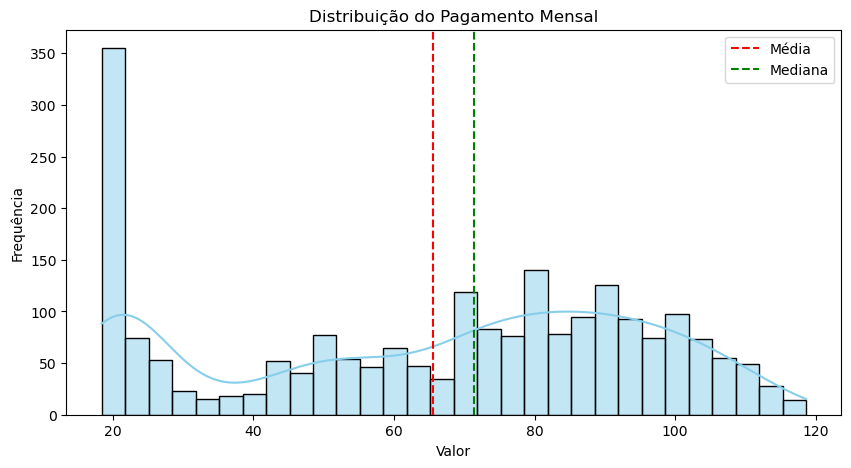

In [173]:
# Histograma
plt.figure(figsize=(10, 5))
sns.histplot(df['Pagamento_Mensal'], kde=True, bins=30, color='skyblue')
plt.axvline(df['Pagamento_Mensal'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(df['Pagamento_Mensal'].median(), color='green', linestyle='--', label='Mediana')
plt.title('Distribuição do Pagamento Mensal')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()
plt.show()

In [175]:
mediana_pagamento = df['Pagamento_Mensal'].median()
df.fillna({'Pagamento_Mensal': mediana_pagamento}, inplace=True)
df['Pagamento_Mensal'].isnull().sum()
# Nesse caso, a substituição pela mediana é menos afetada pelos outliers do que a substituição pela média, pois podemos observar que a média está abaixo da mediana.

0

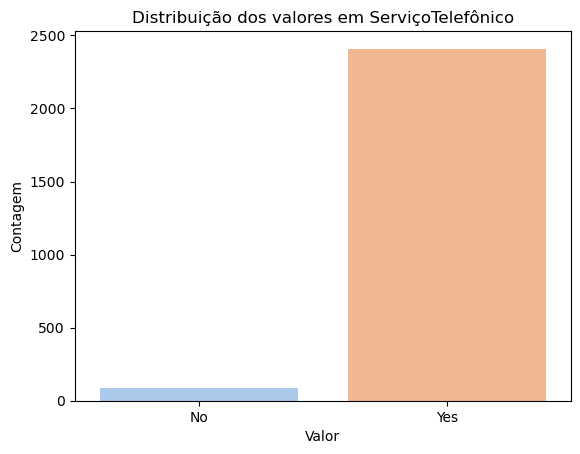

In [185]:
sns.countplot(data=df, x='PhoneService', hue='PhoneService', palette='pastel', legend=False)
plt.title('Distribuição dos valores em ServiçoTelefônico')
plt.xlabel('Valor')
plt.ylabel('Contagem')
plt.show()

In [187]:
# Nesse caso, como os valores para 'Yes' representam a grande maioria dos valores que temos, irei substituir os valores faltantes por esse dado.
df['PhoneService'].fillna('Yes', inplace=True)
df['Pagamento_Mensal'].isnull().sum()

/var/folders/mw/__gkkcr136bb5kyjm821yskh0000gn/T/ipykernel_12428/3559873274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PhoneService'].fillna('Yes', inplace=True)


0

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [148]:
df.columns = df.columns.str.strip()
df['Servico_Internet'] = df['Servico_Internet'].str.upper()
df['Forma_de_Pagamento'].unique()

<StringArray>
[         'Electronic check',              'Mailed check',
 'Bank transfer (automatic)',   'Credit card (automatic)']
Length: 4, dtype: string

In [207]:
df['Genero'] = df['Genero'].astype(str).str.upper().str.strip()
df['Genero'] = df['Genero'].replace({
    'FEMALE': 'FEMALE',
    'F': 'FEMALE',
    'FEMININO': 'FEMALE',
    'MALE': 'MALE',
    'M': 'Male'
})
df['Genero'].unique()

array(['FEMALE', 'MALE', '<NA>'], dtype=object)

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand

In [197]:
df.rename(columns={'customerID': 'ClienteID'}, inplace=True)
df.rename(columns={'Dependents': 'Dependentes'}, inplace=True)
df.rename(columns={'PhoneService': 'ServiçoTelefônico'}, inplace=True)
df.rename(columns={'PaymentMethod': 'Forma_de_Pagamento'}, inplace=True)

In [199]:
df.head(10)

,ClienteID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,ServiçoTelefônico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Forma_de_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,FEMALE,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,MALE,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,MALE,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,MALE,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
4,9237-HQITU,<NA>,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,151.65,Yes
10,9763-GRSKD,<NA>,0,Yes,Yes,13,Yes,dsl,Yes,No,No,Month-to-month,Mailed check,71.45,587.45,No
11,7469-LKBCI,<NA>,0,No,No,16,Yes,No,No internet service,No internet service,No internet service,Two year,Credit card (automatic),71.45,326.80,No
12,8091-TTVAX,<NA>,0,Yes,No,58,Yes,Fiber optic,No,No,Yes,One year,Credit card (automatic),71.45,5681.10,No
13,0280-XJGEX,<NA>,0,No,No,49,Yes,Fiber optic,No,No,Yes,Month-to-month,Bank transfer (automatic),71.45,5036.30,Yes
14,5129-JLPIS,<NA>,0,No,No,25,Yes,Fiber optic,Yes,Yes,Yes,Month-to-month,Electronic check,71.45,2686.05,No
